# INTELLIGENT RAIL

## Edward Jackson

##### Notebook 6 of 6 - Model evaluation and insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras

We import the test data set aside in the previous notebook. Recall that this data has been scaled using a scaler fitted to training data; a separate version also underwent principal component analysis.

In [2]:
test_data = pd.read_csv('data/test_data.csv')

In [3]:
test_data.head()

,month,avg_time_mins,expected_journeys,delayed_departures,avg_delay_departure_all_trains_mins,avg_delay_arrival_all_trains_mins,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,...,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works,target
0,-0.833333,0.383627,-0.723502,-0.341880,-0.330110,-0.091917,0.482297,-0.783686,0.665734,0.098485,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
1,-0.666667,-0.769403,-0.299539,-0.290598,-0.124653,-0.462860,1.536842,-1.277118,-0.394872,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
2,0.166667,1.583949,-0.898618,0.068376,7.502761,0.446896,-0.463158,-0.372493,1.005128,0.000000,...,0.0,0.0,0.0,2.0,3.0,1.062500,0.829268,7.333333,7.750000,1
3,0.833333,-0.231524,1.566820,7.111111,0.565626,-0.211334,-0.018713,-0.875062,0.486610,0.361111,...,0.0,0.0,0.0,0.0,0.0,1.041667,1.000000,0.000000,0.000000,0
4,0.333333,-0.449804,0.668203,5.025641,0.974849,-0.338766,0.236842,-0.429032,0.713462,0.135417,...,0.0,0.0,0.0,1.0,10.0,2.708333,4.439024,12.333333,8.722222,0


In [4]:
X_test = test_data.iloc[:,:-1]
y_test = test_data['target']

In [5]:
X_test.head()

,month,avg_time_mins,expected_journeys,delayed_departures,avg_delay_departure_all_trains_mins,avg_delay_arrival_all_trains_mins,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,...,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
0,-0.833333,0.383627,-0.723502,-0.341880,-0.330110,-0.091917,0.482297,-0.783686,0.665734,0.098485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,-0.666667,-0.769403,-0.299539,-0.290598,-0.124653,-0.462860,1.536842,-1.277118,-0.394872,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.166667,1.583949,-0.898618,0.068376,7.502761,0.446896,-0.463158,-0.372493,1.005128,0.000000,...,0.0,0.0,0.0,0.0,2.0,3.0,1.062500,0.829268,7.333333,7.750000
3,0.833333,-0.231524,1.566820,7.111111,0.565626,-0.211334,-0.018713,-0.875062,0.486610,0.361111,...,0.0,0.0,0.0,0.0,0.0,0.0,1.041667,1.000000,0.000000,0.000000
4,0.333333,-0.449804,0.668203,5.025641,0.974849,-0.338766,0.236842,-0.429032,0.713462,0.135417,...,0.0,0.0,0.0,0.0,1.0,10.0,2.708333,4.439024,12.333333,8.722222


In [6]:
y_test

0       1
1       1
2       1
3       0
4       0
       ..
2356    1
2357    1
2358    1
2359    0
2360    1
Name: target, Length: 2361, dtype: int64

A quick visual inspection confirms that the test data is as expected and we have split it into features and target variable.

The PCA version of the test data is also loaded.

In [7]:
X_test_pca = pd.read_csv('data/X_test_pca.csv')

In [8]:
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-3.595549,-0.703117,-0.315431,-1.208943,-0.792762,-0.174951,1.175692,0.044513,-0.180895,-0.973875,...,-0.032824,1.488325,0.183366,0.910617,-0.288381,0.496262,0.034162,0.234744,0.765456,-0.575328
1,-3.630532,-0.709797,-0.221362,-1.017210,-0.442104,0.523643,-0.221017,1.767352,1.341044,-0.158742,...,0.268944,1.040807,0.150501,-1.060787,0.592028,-0.131732,-0.069632,1.101277,1.153253,0.190096
2,5.092326,5.060610,3.447003,5.165206,0.747857,-0.058794,5.530317,2.029986,1.082065,0.143430,...,0.366414,0.575797,0.873088,0.461676,-2.276538,-0.571255,0.699176,-1.565234,-0.288978,-0.144670
3,-3.280172,-0.410859,0.792386,3.076331,1.187045,2.754310,-4.110757,-3.348170,1.014771,-0.119747,...,0.844355,0.717796,-0.082279,0.686325,-0.573795,-0.306936,0.729601,1.081932,-0.825624,0.277465
4,8.615913,10.528761,9.256113,0.426442,2.291799,2.441679,-1.303252,-1.605081,0.956471,-0.434788,...,-0.877392,0.362751,-0.237732,0.664275,0.061519,-0.095374,0.343151,1.057541,-0.588264,0.015348


## Model Evaluation

We will need the summariser function once again:

In [9]:
def summary(model, features, target, title):
    
    '''
    Model summariser
    ----------------
    
    Parameters:
    model: name of fitted model
    features: X columns (e.g. X_val)
    target: array of target values (e.g. y)
    title: Title of confusion matrix ('')
    
    Returns:
    Classification report & Confusion matrix
    
    '''
    
    
    y_hat = model.predict(features)
    report = classification_report(target, y_hat)
    print(report)
    
    cf_matrix = confusion_matrix(target, y_hat)
    ConfusionMatrixDisplay(cf_matrix).plot(cmap='viridis')
    plt.title(title)
    plt.show()

### Logistic regression

##### Model_01_logit on scaled test data

In [10]:
model_01_logit = pickle.load(open('model_01_logit.pkl', 'rb'))

In [11]:
model_01_accuracy = model_01_logit.score(X_test, y_test)
y_hat_model_01 = model_01_logit.predict(X_test)
print('MODEL 01 EVALUATION - Logistic Regression - scaled test data')
print('--------------------------------------------------------------')
print(f'Test accuracy: {model_01_accuracy}')
print(f'Recall score: {recall_score(y_test, y_hat_model_01)}')
print(f'Precision score: {precision_score(y_test, y_hat_model_01)}')

MODEL 01 EVALUATION - Logistic Regression - scaled test data
--------------------------------------------------------------
Test accuracy: 0.8653113087674714
Recall score: 0.8491525423728814
Precision score: 0.8774080560420315


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1181
           1       0.88      0.85      0.86      1180

    accuracy                           0.87      2361
   macro avg       0.87      0.87      0.87      2361
weighted avg       0.87      0.87      0.87      2361



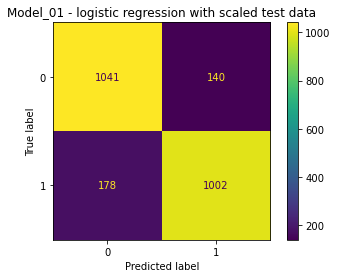

In [12]:
summary(model_01_logit, X_test, y_test, 'Model_01 - logistic regression with scaled test data')

##### Model_02_logit_pca on PCA test data

In [13]:
model_02_logit_pca = pickle.load(open('model_02_logit_pca.pkl', 'rb'))

In [14]:
model_02_accuracy = model_02_logit_pca.score(X_test_pca, y_test)
y_hat_model_02 = model_02_logit_pca.predict(X_test_pca)
print('MODEL 02 EVALUATION - Logistic Regression - PCA test data')
print('--------------------------------------------------------------')
print(f'Test accuracy: {model_02_accuracy}')
print(f'Recall score: {recall_score(y_test, y_hat_model_02)}')
print(f'Precision score: {precision_score(y_test, y_hat_model_02)}')

MODEL 02 EVALUATION - Logistic Regression - PCA test data
--------------------------------------------------------------
Test accuracy: 0.8233799237611181
Recall score: 0.7966101694915254
Precision score: 0.8415398388540735


              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1181
           1       0.84      0.80      0.82      1180

    accuracy                           0.82      2361
   macro avg       0.82      0.82      0.82      2361
weighted avg       0.82      0.82      0.82      2361



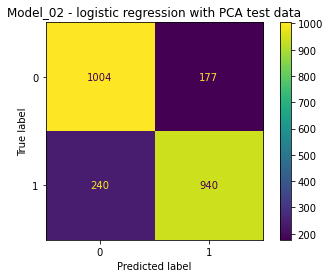

In [15]:
summary(model_02_logit_pca, X_test_pca, y_test, 'Model_02 - logistic regression with PCA test data')

### Support Vector Machines

##### Model_03_svm on scaled test data

In [16]:
model_03_svm = pickle.load(open('model_03_svm.pkl', 'rb'))

In [17]:
model_03_accuracy = model_03_svm.score(X_test, y_test)
y_hat_model_03 = model_03_svm.predict(X_test)
print('MODEL 03 EVALUATION - Support Vector Machine - scaled test data')
print('--------------------------------------------------------------')
print(f'Test accuracy: {model_03_accuracy}')
print(f'Recall score: {recall_score(y_test, y_hat_model_03)}')
print(f'Precision score: {precision_score(y_test, y_hat_model_03)}')

MODEL 03 EVALUATION - Support Vector Machine - scaled test data
--------------------------------------------------------------
Test accuracy: 0.8530283778060144
Recall score: 0.8296610169491525
Precision score: 0.8702222222222222


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1181
           1       0.87      0.83      0.85      1180

    accuracy                           0.85      2361
   macro avg       0.85      0.85      0.85      2361
weighted avg       0.85      0.85      0.85      2361



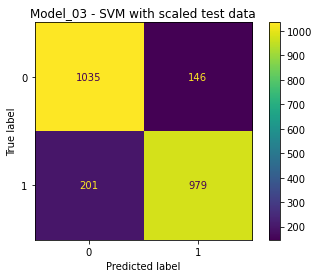

In [18]:
summary(model_03_svm, X_test, y_test, 'Model_03 - SVM with scaled test data')

##### Model_04_svm_pca on PCA test data

In [19]:
model_04_svm_pca = pickle.load(open('model_04_svm_pca.pkl', 'rb'))

In [20]:
model_04_accuracy = model_04_svm_pca.score(X_test_pca, y_test)
y_hat_model_04 = model_04_svm_pca.predict(X_test_pca)
print('MODEL 04 EVALUATION - SVM - PCA test data')
print('--------------------------------------------------------------')
print(f'Test accuracy: {model_04_accuracy}')
print(f'Recall score: {recall_score(y_test, y_hat_model_04)}')
print(f'Precision score: {precision_score(y_test, y_hat_model_04)}')

MODEL 04 EVALUATION - SVM - PCA test data
--------------------------------------------------------------
Test accuracy: 0.8581109699279966
Recall score: 0.823728813559322
Precision score: 0.8844404003639672


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1181
           1       0.88      0.82      0.85      1180

    accuracy                           0.86      2361
   macro avg       0.86      0.86      0.86      2361
weighted avg       0.86      0.86      0.86      2361



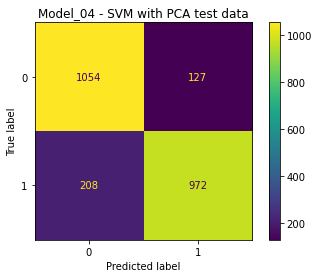

In [21]:
summary(model_04_svm_pca, X_test_pca, y_test, 'Model_04 - SVM with PCA test data')

### Random Forest Classifier

##### Model_05_rf on scaled test data

In [22]:
model_05_rf = pickle.load(open('model_05_rf.pkl', 'rb'))

In [23]:
model_05_accuracy = model_05_rf.score(X_test, y_test)
y_hat_model_05 = model_05_rf.predict(X_test)
print('MODEL 05 EVALUATION - Random Forest Classifier - scaled test data')
print('--------------------------------------------------------------')
print(f'Test accuracy: {model_05_accuracy}')
print(f'Recall score: {recall_score(y_test, y_hat_model_05)}')
print(f'Precision score: {precision_score(y_test, y_hat_model_05)}')

MODEL 05 EVALUATION - Random Forest Classifier - scaled test data
--------------------------------------------------------------
Test accuracy: 0.8022024565861923
Recall score: 0.8025423728813559
Precision score: 0.8018628281117697


              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1181
           1       0.80      0.80      0.80      1180

    accuracy                           0.80      2361
   macro avg       0.80      0.80      0.80      2361
weighted avg       0.80      0.80      0.80      2361



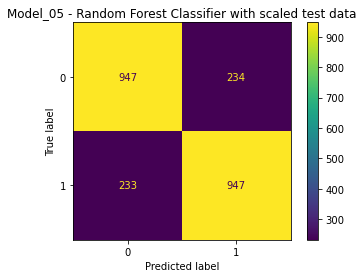

In [24]:
summary(model_05_rf, X_test, y_test, 'Model_05 - Random Forest Classifier with scaled test data')

##### Model_06_rf_pca on PCA test data

In [25]:
model_06_rf_pca = pickle.load(open('model_06_rf_pca.pkl', 'rb'))

In [26]:
model_06_accuracy = model_06_rf_pca.score(X_test_pca, y_test)
y_hat_model_06_pca = model_06_rf_pca.predict(X_test_pca)
print('MODEL 06 EVALUATION - Random Forest Classifier - PCA test data')
print('--------------------------------------------------------------')
print(f'Test accuracy: {model_06_accuracy}')
print(f'Recall score: {recall_score(y_test, y_hat_model_06_pca)}')
print(f'Precision score: {precision_score(y_test, y_hat_model_06_pca)}')

MODEL 06 EVALUATION - Random Forest Classifier - PCA test data
--------------------------------------------------------------
Test accuracy: 0.7848369335027531
Recall score: 0.7508474576271187
Precision score: 0.8054545454545454


              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1181
           1       0.81      0.75      0.78      1180

    accuracy                           0.78      2361
   macro avg       0.79      0.78      0.78      2361
weighted avg       0.79      0.78      0.78      2361



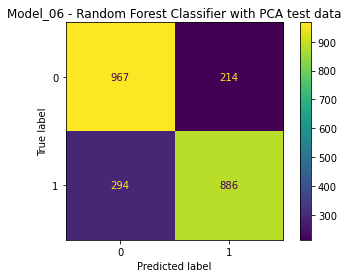

In [27]:
summary(model_06_rf_pca, X_test_pca, y_test, 'Model_06 - Random Forest Classifier with PCA test data')

### XG Boost

##### Model_07_xgb on scaled test data

In [28]:
model_07_xgb = pickle.load(open('model_07_xgb.pkl', 'rb'))

In [29]:
model_07_accuracy = model_07_xgb.score(np.array(X_test), y_test)     # array required here for XG Boost
y_hat_model_07 = model_07_xgb.predict(np.array(X_test))
print('MODEL 07 EVALUATION - XG Boost - scaled test data')
print('--------------------------------------------------------------')
print(f'Test accuracy: {model_07_accuracy}')
print(f'Recall score: {recall_score(y_test, y_hat_model_07)}')
print(f'Precision score: {precision_score(y_test, y_hat_model_07)}')

MODEL 07 EVALUATION - XG Boost - scaled test data
--------------------------------------------------------------
Test accuracy: 0.8534519271495129
Recall score: 0.8355932203389831
Precision score: 0.8664323374340949


              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1181
           1       0.87      0.84      0.85      1180

    accuracy                           0.85      2361
   macro avg       0.85      0.85      0.85      2361
weighted avg       0.85      0.85      0.85      2361



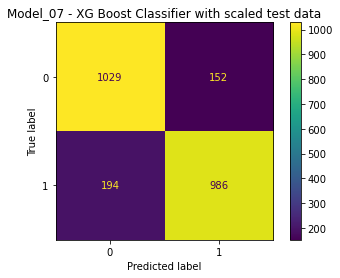

In [30]:
summary(model_07_xgb, np.array(X_test), y_test, 'Model_07 - XG Boost Classifier with scaled test data')

##### Model_08_xgb_pca on PCA test data

In [31]:
model_08_xgb_pca = pickle.load(open('model_08_xgb_pca.pkl', 'rb'))

In [32]:
model_08_accuracy = model_08_xgb_pca.score(np.array(X_test_pca), y_test)
y_hat_model_08_pca = model_08_xgb_pca.predict(np.array(X_test_pca))
print('MODEL 08 EVALUATION - XG Boost - PCA test data')
print('--------------------------------------------------------------')
print(f'Test accuracy: {model_08_accuracy}')
print(f'Recall score: {recall_score(y_test, y_hat_model_08_pca)}')
print(f'Precision score: {precision_score(y_test, y_hat_model_08_pca)}')

MODEL 08 EVALUATION - XG Boost - PCA test data
--------------------------------------------------------------
Test accuracy: 0.795425667090216
Recall score: 0.7779661016949152
Precision score: 0.8059701492537313


              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1181
           1       0.81      0.78      0.79      1180

    accuracy                           0.80      2361
   macro avg       0.80      0.80      0.80      2361
weighted avg       0.80      0.80      0.80      2361



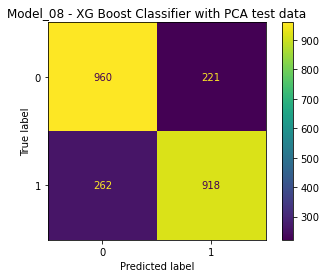

In [33]:
summary(model_08_xgb_pca, np.array(X_test_pca), y_test, 'Model_08 - XG Boost Classifier with PCA test data')

### Keras convolutional neural network

##### Model_09_keras on scaled test data

In [34]:
model_09_keras = keras.models.load_model('model_09_keras')

In [35]:
test_scores = model_09_keras.evaluate(X_test, y_test)
print(f'Test accuracy: {test_scores[1]}')

74/74 [==============================] - 1s 1ms/step - loss: 0.3420 - binary_accuracy: 0.8873
Test accuracy: 0.8873358964920044


In [36]:
y_hat_model_09 = model_09_keras.predict(X_test)

In [37]:
report_newmodel = classification_report(y_test, np.round(y_hat_model_09,0))    # predictions must be rounded to binary integers
print(report_newmodel)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1181
           1       0.88      0.89      0.89      1180

    accuracy                           0.89      2361
   macro avg       0.89      0.89      0.89      2361
weighted avg       0.89      0.89      0.89      2361



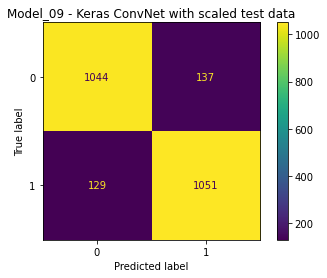

In [38]:
cf_matrix = confusion_matrix(y_test, np.round(y_hat_model_09,0))

ConfusionMatrixDisplay(cf_matrix).plot(cmap='viridis')
plt.title('Model_09 - Keras ConvNet with scaled test data')
plt.show()

##### Model_10_keras_pca on PCA test data

In [39]:
model_10_keras_pca = keras.models.load_model('model_10_keras_pca')

In [40]:
test_scores = model_10_keras_pca.evaluate(X_test_pca, y_test)
print(f'Test accuracy: {test_scores[1]}')

74/74 [==============================] - 0s 994us/step - loss: 0.3012 - binary_accuracy: 0.8818
Test accuracy: 0.8818297386169434


In [41]:
y_hat_model_10 = model_10_keras_pca.predict(X_test_pca)

In [42]:
report_newmodel = classification_report(y_test, np.round(y_hat_model_10,0))    # predictions must be rounded to binary integers
print(report_newmodel)

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1181
           1       0.91      0.84      0.88      1180

    accuracy                           0.88      2361
   macro avg       0.88      0.88      0.88      2361
weighted avg       0.88      0.88      0.88      2361



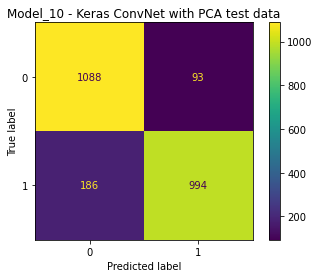

In [43]:
cf_matrix = confusion_matrix(y_test, np.round(y_hat_model_10,0))

ConfusionMatrixDisplay(cf_matrix).plot(cmap='viridis')
plt.title('Model_10 - Keras ConvNet with PCA test data')
plt.show()

**N.B.** Please find comments and insights on these evaluations in the separate white paper.